# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

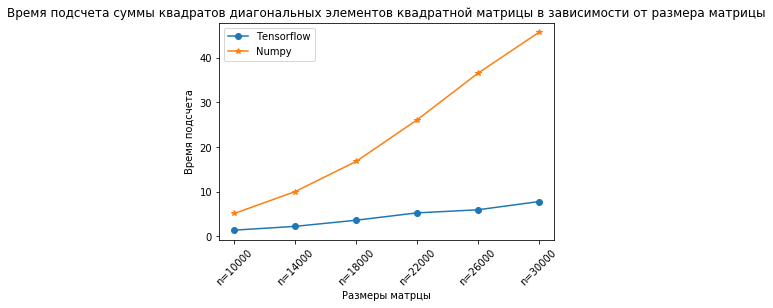

In [2]:
import time
tf.reset_default_graph()
sess = tf.Session()

time_spent_tf = []
for i in range(10000, 30001, 4000):
    X = tf.random.normal((i, i), mean = 1.0, stddev = 0.5)
    Y = tf.reduce_sum(tf.diag_part(X) * tf.diag_part(X))
    begin = time.time()
    sess.run(Y)
    end = time.time()
    time_spent_tf.append(end - begin)



time_spent_np = []
for i in range(10000, 30001, 4000):
  begin = time.time()
  X = np.random.normal(1.0, 0.5, (i, i))
  Y = np.sum(np.diagonal(X) * np.diagonal(X))
  end = time.time()
  time_spent_np.append(end - begin)
  


# plot results
plt.plot(['n=' + str(i)   for i in range(10000, 30001, 4000)], time_spent_tf, marker='o', label='Tensorflow')
plt.plot(['n=' + str(i)   for i in range(10000, 30001, 4000)], time_spent_np, marker='*', label='Numpy')
plt.legend(loc = 'best')
plt.xlabel("Размеры матрцы")
plt.ylabel('Время подсчета')
plt.xticks(rotation=45)
plt.title('Время подсчета суммы квадратов диагональных элементов квадратной матрицы в зависимости от размера матрицы')
sess.close()

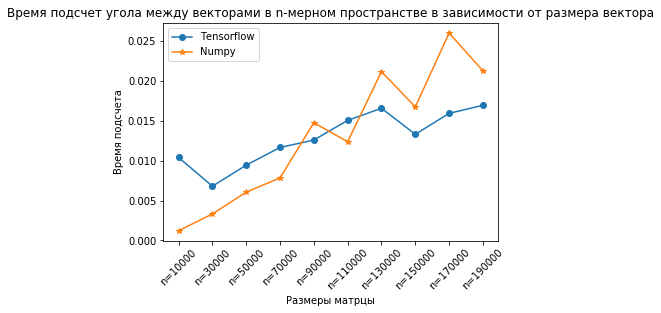

In [3]:
import time
tf.reset_default_graph()
sess = tf.Session()

time_spent_tf = []
for i in range(10000, 200001, 20000):
    X1 = tf.random.normal( (1,i), mean = 1.0, stddev = 0.5)
    X2 = tf.random.normal((1,i), mean = 1.0, stddev = 0.5)
    Y = tf.acos((tf.reduce_sum((X1 * X2)))/tf.compat.v1.math.sqrt(tf.reduce_sum((X1 * X1)) * tf.reduce_sum((X2 * X2))))
    begin = time.time()
    sess.run(Y)
    end = time.time()
    time_spent_tf.append(end - begin)



time_spent_np = []
for i in range(10000, 200001, 20000):
  
  begin = time.time()
  X1 = np.random.normal(1.0, 0.5,  i)
  X2 = np.random.normal(1.0, 0.5,  i)
  Y = np.arccos((np.sum((X1 * X2))/np.sqrt(np.sum((X1 * X1)) * np.sum((X2 * X2)))))
  end = time.time()
  time_spent_np.append(end - begin)
  


# plot results
plt.plot(['n=' + str(i)   for i in range(10000, 200001, 20000)], time_spent_tf, marker='o', label='Tensorflow')
plt.plot(['n=' + str(i)   for i in range(10000, 200001, 20000)], time_spent_np, marker='*', label='Numpy')
plt.legend(loc = 'best')
plt.xticks(rotation=45)
plt.xlabel("Размеры матрцы")
plt.ylabel('Время подсчета')
plt.title('Время подсчет угола между векторами в n-мерном пространстве в зависимости от размера вектора')
plt.show()
sess.close()



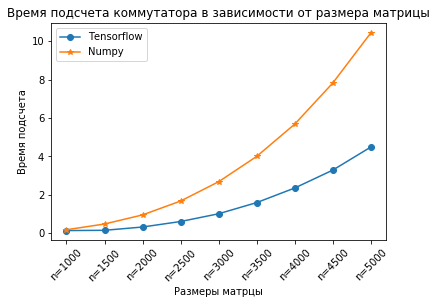

In [4]:
import time
tf.reset_default_graph()
sess = tf.Session()

time_spent_tf = []
for i in range(1000, 5001, 500):
    X1 = tf.random.normal((i, i), mean = 1.0, stddev = 0.5)
    X2 = tf.random.normal((i, i), mean = 1.0, stddev = 0.5)
    Y = tf.matmul(X1, X2) - tf.matmul(X2, X1)
    begin = time.time()
    sess.run(Y)
    end = time.time()
    time_spent_tf.append(end - begin)



time_spent_np = []
for i in range(1000, 5001, 500):
  begin = time.time()
  X1 = np.random.normal(1.0, 0.5, (i, i))
  X2 = np.random.normal(1.0, 0.5, (i, i))
  Y = np.dot(X1, X2) - np.dot(X2, X1)
  end = time.time()
  time_spent_np.append(end - begin)
  


# plot results
plt.plot(['n=' + str(i)   for i in range(1000, 5001, 500)], time_spent_tf, marker='o', label='Tensorflow')
plt.plot(['n=' + str(i)   for i in range(1000, 5001, 500)], time_spent_np, marker='*', label='Numpy')
plt.legend(loc = 'best')
plt.xlabel("Размеры матрцы")
plt.ylabel('Время подсчета')
plt.title('Время подсчета коммутатора в зависимости от размера матрицы')
plt.xticks(rotation=45)
sess.close()

Данные три графика показывают, что подсчеты осуществляются быстрее при помощи tensorflow, нежели в numpy. Лучше всего видно разница в скоростях на двухмерных массивах. На семенарах нам объяснили, что это частично связано с выполнением операций дивайсах с GPU & CPU(централиный и графический процессоры), плюс к тому же tensorflow выполняет вычисления с помощью высоко оптимизированного C++, что позволяет добиться таких скоростей. 

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [7]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = X.shape[0] // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

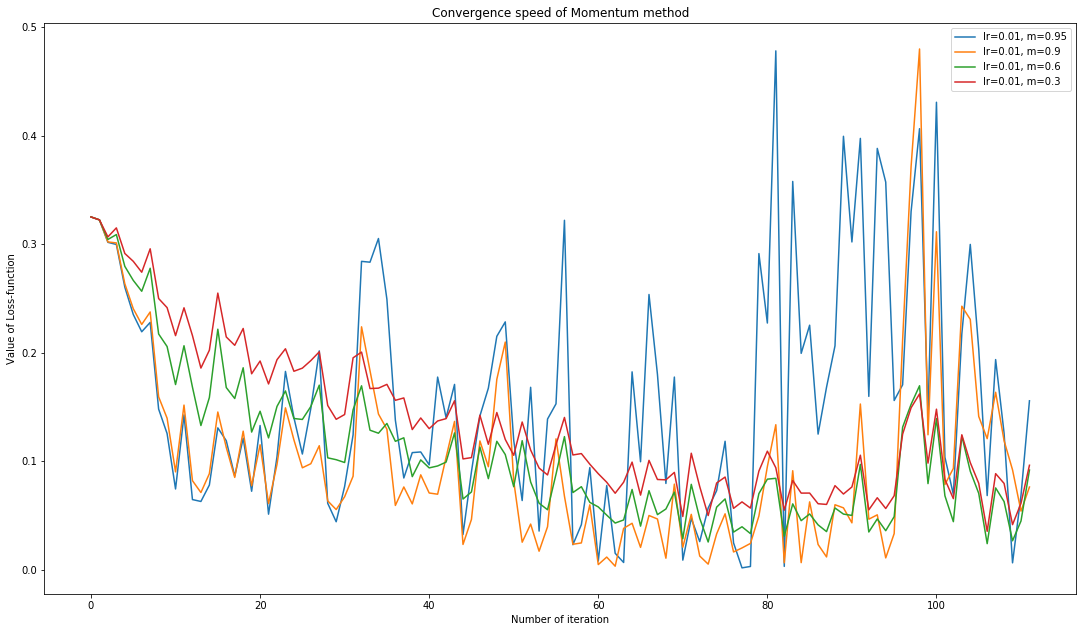

In [10]:
n_batch_train = X.shape[0] // 16

plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.95).minimize(loss)), label='lr=0.01, m=0.95')

plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss)), label='lr=0.01, m=0.9')

plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.6).minimize(loss)), label='lr=0.01, m=0.6')

plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.3).minimize(loss)), label='lr=0.01, m=0.3')
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss-function')
plt.title('Convergence speed of Momentum method')
plt.legend(loc='best')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Ваш ответ: На графике видно, что быстрее всего достигается минимум при значениии momentum = 0.9, что является его дефолтным значением, к тому обладает самым минимальным значение ошибки. Из трех графиков видно, что чем меньше значение данного параметра, тем медленнее скороть сходимости.

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

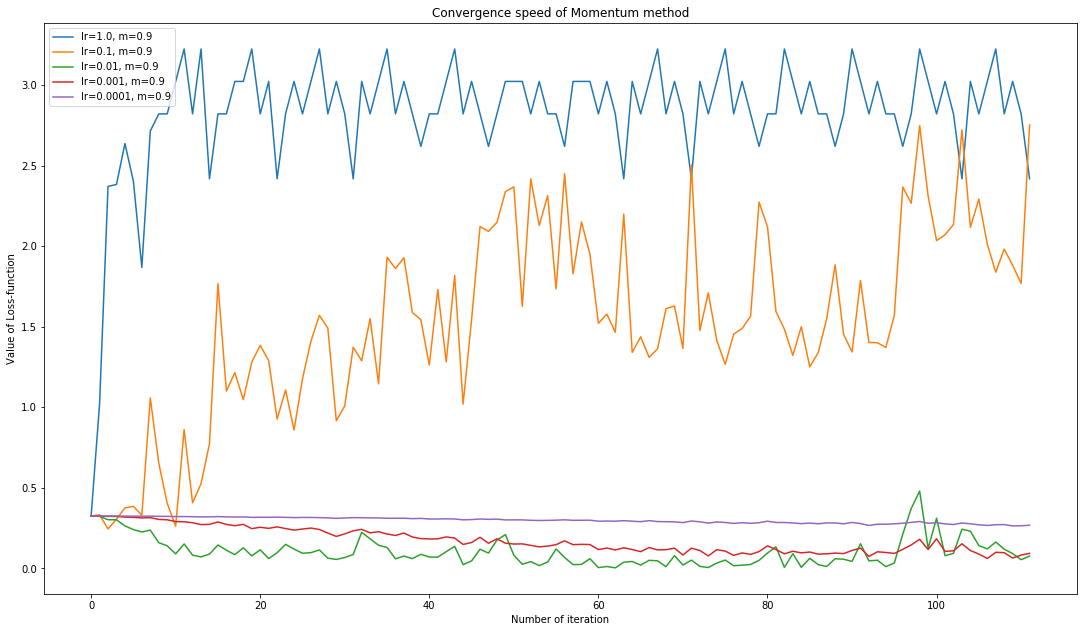

In [11]:
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(1.0, 0.9).minimize(loss)), label='lr=1.0, m=0.9')
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.1, 0.9).minimize(loss)), label='lr=0.1, m=0.9')
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss)), label='lr=0.01, m=0.9')
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss)), label='lr=0.001, m=0.9')
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.0001, 0.9).minimize(loss)), label='lr=0.0001, m=0.9')
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss-function')
plt.title('Convergence speed of Momentum method')
plt.legend(loc='best')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Ваш ответ: Как и ожидалось, лучше всего сходится при шаге равном 0.01, хотя график имеет довольно высокие колебания по сравнению с графиками, которые имеют шаг равный 0.001 или 0.0001, несмотря на это он значитеьно быстрее них. 

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

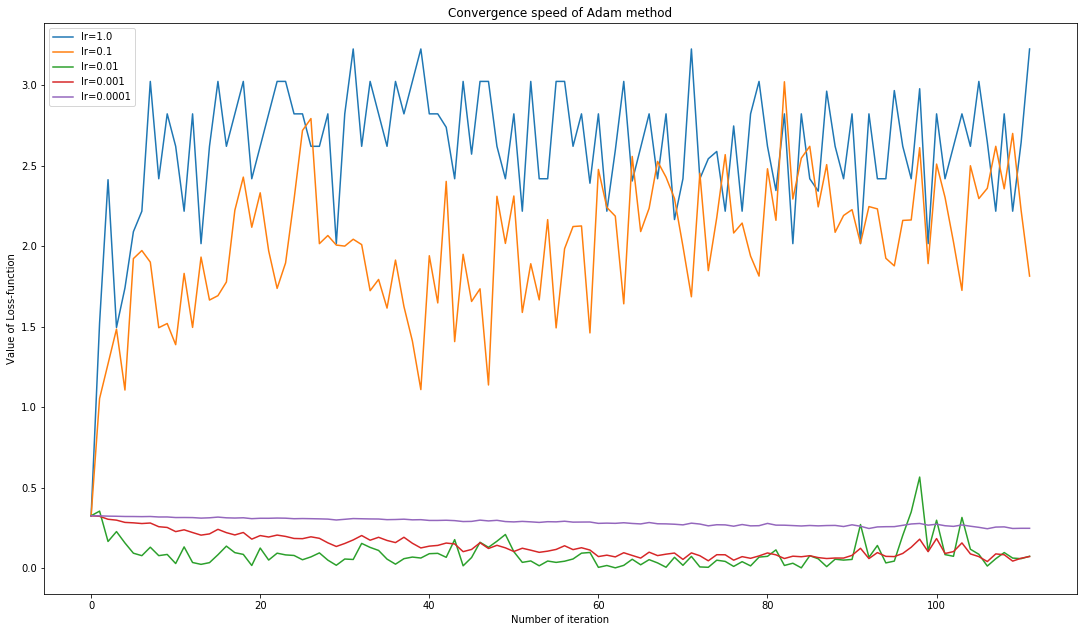

In [12]:
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=1.0).minimize(loss)), label='lr=1.0')
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)), label='lr=0.1')
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)), label='lr=0.01')
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)), label='lr=0.001')
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)), label='lr=0.0001')
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss-function')
plt.title('Convergence speed of Adam method')
plt.legend(loc='best')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Ваш ответ: На графике видно, что самый лучший шаг равен 0.01 при данном значении, но при есть небольшой минус - это разброс, который немного больше чем при шаге в 0.001. 

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

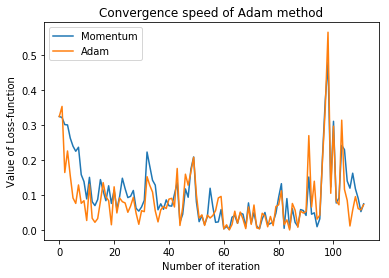

In [13]:
plt.plot(range(n_batch_train), train(X, y, tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss)), label='Momentum')
plt.plot(range(n_batch_train), train(X, y, tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)), label='Adam')
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss-function')
plt.title('Convergence speed of Adam method')
plt.legend(loc='best')

plt.show()

Ваш ответ: В целом нет значительной разницы между данными оптимизаторами, но при это видно превосходство метода Адам, т.к. он обладает инерцией, что помогает ему сходиться быстрее в паривльном направлении быстрее. 

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [0]:
import sys
import os
import time

import numpy as np

__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return (data / np.float32(256)).squeeze()

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [2]:
X_train, y_train, X_test, y_test, _, _ = load_dataset()
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

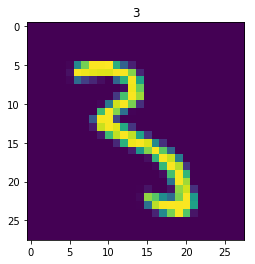

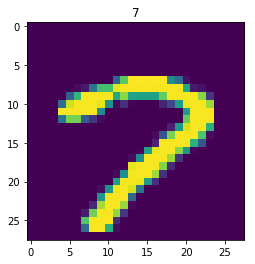

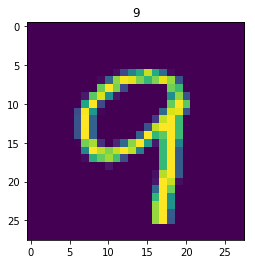

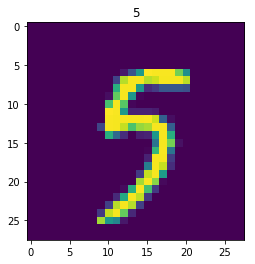

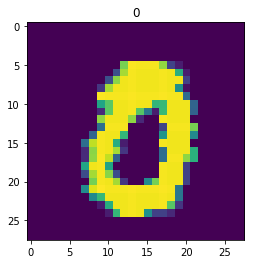

In [6]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [5]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size 
        n_batch_test = len(X_test) // batch_size 
        for epoch in range(10):            ### увеличил число эпох для достяжения лучшего качества, что видно дальше
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

                                           ### убрал разделение между обчунием и тестом, для удобства подсчета точности, также это привело к
                                           ### увелечинию точности при каждой новой эпохе (раньше точность была одинаковой при каждой эпохе)
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 512, activation=tf.nn.relu)
layer2 = tf.layers.dense(layer1, 256, activation=tf.nn.relu)
layer3 = tf.layers.dense(layer2, 128, activation=tf.nn.relu)
layer4 = tf.layers.dense(layer3, 64, activation=tf.nn.relu)

#<define architecture as a function of X_input>
n_labels = len(np.unique(y_train))

logits = tf.layers.dense(layer4, n_labels)

predicted = tf.nn.softmax(logits) #<define 10-class outputs>

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.one_hot(y_input, depth=n_labels))

#<define log loss with one-hot vector of labels
train_op =tf.train.AdamOptimizer().minimize(loss) #<define train operation here>

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Test accuracy:  0.9425
Test accuracy:  0.9698
Test accuracy:  0.9705
Test accuracy:  0.9734
Test accuracy:  0.9759
Test accuracy:  0.9768
Test accuracy:  0.9767
Test accuracy:  0.9765
Test accuracy:  0.9747
Test accuracy:  0.9811


## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Данное задание помогло мне понять немного лучше tensorlow, но несмотря на это я все ещё считаю, что мне нужны задания такого рода или даже проще, потому что часть моментов(с учетом индивидуального изучения) остается "черным ящиком", что явно нехорошо. Курс в целом классный, главный минус - это курсера на английском, жалко, что данный курс не сделали на русском, потому что крайне много инфрмации и о tensorflow на английском и маленький мизир на русском, которого явно не хватает. В таком случае прошлые лекции были лучше. Вот)